In [1]:
import matplotlib.image as mpimg
import rasterio
import os
import numpy

In [2]:
def split_and_label(img,field_size=228):
    data = []
    labels = []
    r = img['R'].reshape((img['R'].shape[0],img['R'].shape[1],1))
    g = img['G'].reshape((img['R'].shape[0],img['R'].shape[1],1))
    b = img['B'].reshape((img['R'].shape[0],img['R'].shape[1],1))
    n = img['NVDI'].reshape((img['R'].shape[0],img['R'].shape[1],1))
    rgb = numpy.concatenate([r,g,b], axis=2)
    
    for i in range(0,r.shape[0],field_size):
        for j in range(0,r.shape[1],field_size):
            if r.shape[0] - i >= field_size and r.shape[1] - j >= field_size:
                data.append(rgb[i:i + field_size,j:j + field_size].reshape(1,field_size,field_size,3))
                labels.append(n[i:i + field_size,j:j + field_size].reshape(1,field_size,field_size))
            
    return numpy.vstack(data), numpy.vstack(labels)        
            
    

processed = {}
directory = "data"

for file in os.listdir(directory):
    imgs = {}
    print ("load: ", file)
    filename = os.path.join(directory,file)
    filename_lst = file.split("_")
    if len(filename_lst) == 3:
        id_ = filename_lst[0] + "_" + filename_lst[1]
        type_ = filename_lst[2]

        if id_ not in processed: 
            processed[id_] = True
            try:
                imgs['B'] = mpimg.imread(os.path.join(directory,id_ + "_B02.jp2"))
                imgs['G'] = mpimg.imread(os.path.join(directory,id_ + "_B03.jp2"))
                imgs['R'] = mpimg.imread(os.path.join(directory,id_ + "_B04.jp2"))
                imgs['NVDI'] = rasterio.open(os.path.join(directory,id_ + "_NVDI.tif")).read()
            except:
                print("Not enouth data to process img: ", id_)
                continue
                
            print ("process: ", id_)
            data, labels = split_and_label(imgs)
            print ("data shape:", data.shape)
            print("data sample:", data[:2])
            print ("labels shape:", labels.shape)
            print("labels sample:", labels[:2])
            
            numpy.save(id_ + "data",data)
            numpy.save(id_ + "centinel2_nvdi_labels",labels)
            
            del  imgs['B']
            del  imgs['R']
            del  imgs['G']
            del  imgs['NVDI']
    
#data = numpy.vstack(all_data)    
#labels = numpy.vstack(all_labels)    



load:  T36UYA_20180919T083621_B04.jp2


/home/keen/.pyenv/versions/3.6.2/lib/python3.6/site-packages/PIL/Image.py:2858: DecompressionBombWarning: Image size (120560400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


process:  T36UYA_20180919T083621
data shape: (2304, 228, 228, 3)
data sample: [[[[1408 1546 1996]
   [1450 1568 2028]
   [1422 1532 2050]
   ...
   [2096 1944 2278]
   [2054 1912 2272]
   [2044 1906 2298]]

  [[1184 1450 1888]
   [1414 1540 1986]
   [1430 1544 2016]
   ...
   [2112 1980 2334]
   [2118 1946 2284]
   [2078 1892 2240]]

  [[1088 1530 1856]
   [1306 1484 1922]
   [1426 1542 2016]
   ...
   [2158 1972 2316]
   [2166 1948 2300]
   [2058 1914 2272]]

  ...

  [[1406 1746 1978]
   [1532 1794 1968]
   [1412 1758 1954]
   ...
   [2648 2380 2566]
   [2594 2360 2542]
   [2524 2308 2512]]

  [[1288 1756 1934]
   [1322 1734 1922]
   [1256 1672 1934]
   ...
   [2580 2332 2528]
   [2580 2338 2546]
   [2588 2338 2518]]

  [[1268 1712 1940]
   [1238 1712 1922]
   [1242 1680 1954]
   ...
   [2586 2312 2536]
   [2588 2326 2518]
   [2624 2328 2500]]]


 [[[2050 1914 2284]
   [2136 1966 2302]
   [2178 2018 2326]
   ...
   [1226 1540 1878]
   [1128 1520 1828]
   [1050 1486 1794]]

  [[2086 1

load:  T36UXB_20180917T084609_B03.jp2
process:  T36UXB_20180917T084609
data shape: (2304, 228, 228, 3)
data sample: [[[[1318 1540 1824]
   [1382 1600 1874]
   [1398 1590 1858]
   ...
   [2012 2012 2208]
   [2008 1998 2186]
   [2132 2034 2228]]

  [[1340 1524 1810]
   [1358 1548 1850]
   [1400 1578 1840]
   ...
   [2082 2056 2192]
   [2082 2002 2198]
   [2122 2040 2242]]

  [[1340 1518 1818]
   [1310 1524 1828]
   [1384 1574 1830]
   ...
   [2274 2092 2306]
   [2196 2062 2272]
   [2110 2022 2218]]

  ...

  [[1176 1580 1776]
   [1174 1604 1790]
   [1182 1578 1776]
   ...
   [ 818 1284 1612]
   [ 774 1244 1578]
   [ 796 1264 1610]]

  [[1160 1554 1796]
   [1152 1574 1758]
   [1146 1562 1790]
   ...
   [ 856 1254 1628]
   [ 796 1252 1596]
   [ 890 1310 1640]]

  [[1162 1576 1802]
   [1160 1568 1788]
   [1154 1558 1802]
   ...
   [ 872 1304 1656]
   [ 884 1338 1642]
   [ 902 1336 1652]]]


 [[[2306 2100 2318]
   [2320 2102 2314]
   [2356 2100 2346]
   ...
   [2898 2400 2564]
   [2894 2386 

load:  T36UYA_20180825T083549_B02.jp2
process:  T36UYA_20180825T083549
data shape: (2304, 228, 228, 3)
data sample: [[[[2788 2416 2510]
   [2722 2334 2466]
   [2714 2374 2472]
   ...
   [3046 2444 2520]
   [3074 2486 2558]
   [3064 2470 2490]]

  [[2372 2136 2304]
   [2662 2288 2466]
   [2640 2346 2436]
   ...
   [3162 2522 2572]
   [3118 2530 2578]
   [3136 2532 2570]]

  [[1806 1930 2054]
   [2600 2286 2374]
   [2668 2338 2448]
   ...
   [3218 2590 2592]
   [3198 2576 2568]
   [3276 2614 2624]]

  ...

  [[1412 1808 1886]
   [1460 1840 1910]
   [1392 1820 1876]
   ...
   [2778 2396 2512]
   [2690 2360 2526]
   [2610 2318 2486]]

  [[1254 1840 1850]
   [1324 1804 1844]
   [1260 1726 1834]
   ...
   [2756 2420 2484]
   [2750 2416 2510]
   [2702 2352 2490]]

  [[1180 1782 1844]
   [1172 1794 1832]
   [1144 1754 1816]
   ...
   [2736 2400 2502]
   [2760 2418 2508]
   [2726 2380 2502]]]


 [[[3200 2570 2580]
   [3332 2650 2612]
   [3480 2714 2662]
   ...
   [1138 1598 1818]
   [1058 1552 

load:  T37UCR_20180611T083601_B08.jp2
process:  T37UCR_20180611T083601
data shape: (2304, 228, 228, 3)
data sample: [[[[2026 1912 2068]
   [1566 1668 1980]
   [1512 1624 1948]
   ...
   [ 836 1506 1660]
   [ 832 1494 1678]
   [ 836 1518 1694]]

  [[1844 1746 2026]
   [1482 1596 1958]
   [1526 1622 1924]
   ...
   [ 848 1512 1658]
   [ 832 1514 1644]
   [ 840 1518 1676]]

  [[1540 1582 1912]
   [1402 1610 1872]
   [1444 1574 1900]
   ...
   [ 858 1506 1686]
   [ 844 1514 1656]
   [ 854 1502 1664]]

  ...

  [[1086 1512 1760]
   [1096 1496 1744]
   [1076 1486 1748]
   ...
   [1636 1810 2016]
   [1628 1816 2026]
   [1624 1844 2016]]

  [[1070 1506 1738]
   [1084 1498 1726]
   [1094 1486 1730]
   ...
   [1644 1796 2006]
   [1612 1806 2026]
   [1630 1824 2008]]

  [[1114 1504 1750]
   [1102 1504 1746]
   [1094 1522 1746]
   ...
   [1640 1780 2022]
   [1622 1812 2012]
   [1610 1794 1992]]]


 [[[ 860 1538 1700]
   [ 894 1568 1684]
   [ 904 1582 1666]
   ...
   [ 730 1420 1568]
   [ 768 1478 

data shape: (2304, 228, 228, 3)
data sample: [[[[1648 1722 2172]
   [1636 1724 2122]
   [1630 1732 2162]
   ...
   [1958 1978 2186]
   [1980 1970 2204]
   [1994 1970 2224]]

  [[1630 1708 2180]
   [1608 1716 2186]
   [1612 1724 2152]
   ...
   [2004 2008 2202]
   [1964 1954 2228]
   [1956 1968 2202]]

  [[1634 1706 2170]
   [1648 1712 2150]
   [1612 1712 2116]
   ...
   [2008 1990 2214]
   [1926 1942 2216]
   [1882 1944 2174]]

  ...

  [[1578 1910 2104]
   [1670 1984 2156]
   [1838 2062 2238]
   ...
   [2186 2308 2342]
   [2172 2310 2348]
   [2194 2306 2364]]

  [[1526 1970 2132]
   [1620 2040 2162]
   [1884 2082 2210]
   ...
   [2202 2276 2320]
   [2178 2330 2354]
   [2202 2324 2362]]

  [[1540 1998 2148]
   [1660 2036 2166]
   [1790 2022 2184]
   ...
   [2216 2344 2342]
   [2192 2346 2364]
   [2208 2326 2370]]]


 [[[2026 2008 2238]
   [1992 1974 2242]
   [1948 1978 2208]
   ...
   [2002 1950 2294]
   [2054 2006 2334]
   [2054 1996 2344]]

  [[1972 1968 2212]
   [1966 1934 2218]
   

load:  T36UYB_20180820T083601_B04.jp2
process:  T36UYB_20180820T083601
data shape: (2304, 228, 228, 3)
data sample: [[[[1596 1692 2122]
   [1588 1692 2106]
   [1582 1698 2098]
   ...
   [1706 2454 2242]
   [1742 2498 2218]
   [1768 2522 2248]]

  [[1602 1672 2112]
   [1570 1698 2098]
   [1568 1680 2134]
   ...
   [1752 2470 2244]
   [1762 2480 2220]
   [1736 2458 2228]]

  [[1554 1672 2096]
   [1584 1680 2098]
   [1576 1702 2150]
   ...
   [1732 2420 2236]
   [1712 2482 2240]
   [1710 2470 2230]]

  ...

  [[1386 1884 2022]
   [1402 1890 2062]
   [1420 1898 2048]
   ...
   [1738 2624 2234]
   [1726 2658 2256]
   [1750 2604 2278]]

  [[1330 1900 1986]
   [1380 1936 2048]
   [1360 1800 1972]
   ...
   [1708 2648 2240]
   [1694 2612 2234]
   [1734 2594 2266]]

  [[1334 1900 1998]
   [1350 1930 2056]
   [1312 1808 1980]
   ...
   [1722 2618 2220]
   [1712 2614 2230]
   [1724 2652 2264]]]


 [[[1724 2500 2224]
   [1722 2466 2194]
   [1772 2498 2244]
   ...
   [2204 2108 2376]
   [2132 1974 

load:  T37UCR_20180731T083601_B04.jp2
process:  T37UCR_20180731T083601
data shape: (2304, 228, 228, 3)
data sample: [[[[1882 1816 2130]
   [1268 1664 1962]
   [1256 1702 1978]
   ...
   [2962 2398 2408]
   [2896 2352 2376]
   [2788 2332 2360]]

  [[1798 1788 2120]
   [1264 1648 1958]
   [1306 1680 1962]
   ...
   [2952 2382 2450]
   [2902 2330 2346]
   [2958 2362 2410]]

  [[1444 1670 2002]
   [1150 1632 1906]
   [1282 1716 1966]
   ...
   [2804 2274 2364]
   [2842 2324 2342]
   [2946 2344 2414]]

  ...

  [[1042 1604 1862]
   [1048 1580 1858]
   [1044 1570 1868]
   ...
   [1036 1954 1952]
   [1036 1948 1924]
   [1026 1950 1916]]

  [[1038 1590 1878]
   [1058 1568 1890]
   [1048 1586 1852]
   ...
   [1030 1944 1932]
   [1072 1954 1916]
   [1060 1926 1900]]

  [[1034 1612 1856]
   [1076 1600 1880]
   [1042 1590 1856]
   ...
   [1036 1932 1918]
   [1046 1962 1922]
   [1056 1946 1922]]]


 [[[2566 2186 2280]
   [1938 1948 2106]
   [1446 1826 1986]
   ...
   [ 884 1490 1784]
   [ 894 1528 

process:  T37UCS_20180825T083549
data shape: (2304, 228, 228, 3)
data sample: [[[[3442 3796 4260]
   [3182 3688 4256]
   [2700 3214 3752]
   ...
   [1496 1628 2046]
   [1454 1598 1998]
   [1466 1600 1978]]

  [[3682 3754 4098]
   [3996 4096 4476]
   [3814 4030 4446]
   ...
   [1488 1604 2002]
   [1470 1594 1948]
   [1380 1572 1988]]

  [[2278 2476 2556]
   [2722 2936 3094]
   [3078 3290 3538]
   ...
   [1470 1594 1978]
   [1448 1548 1940]
   [1370 1522 1908]]

  ...

  [[2678 2392 2490]
   [2660 2322 2468]
   [2654 2356 2478]
   ...
   [2204 2160 2370]
   [2284 2110 2354]
   [2092 2092 2316]]

  [[2616 2332 2456]
   [2610 2326 2464]
   [2638 2340 2484]
   ...
   [2242 2130 2358]
   [2194 2042 2304]
   [2054 2052 2280]]

  [[2560 2306 2456]
   [2552 2300 2436]
   [2586 2308 2434]
   ...
   [2310 2150 2382]
   [2084 2024 2268]
   [2012 1978 2264]]]


 [[[1374 1614 1928]
   [1106 1642 1828]
   [1022 1652 1760]
   ...
   [1672 2046 2008]
   [1700 2046 2038]
   [1710 2046 2024]]

  [[1392 1

process:  T36UXA_20180914T083549
data shape: (2304, 228, 228, 3)
data sample: [[[[1040 1528 2008]
   [1016 1532 1974]
   [1056 1592 2010]
   ...
   [1098 1446 1910]
   [1128 1514 1906]
   [1098 1494 1924]]

  [[1082 1572 2016]
   [1070 1584 1998]
   [1062 1554 1992]
   ...
   [1012 1484 1858]
   [ 992 1472 1892]
   [1052 1470 1942]]

  [[1084 1568 2018]
   [1058 1564 2000]
   [1050 1596 2010]
   ...
   [1028 1482 1888]
   [1012 1462 1896]
   [1028 1448 1860]]

  ...

  [[ 884 1370 1926]
   [ 892 1378 1910]
   [ 910 1386 1922]
   ...
   [1294 1692 2038]
   [1250 1676 2024]
   [1220 1650 2002]]

  [[ 898 1394 1912]
   [ 902 1380 1918]
   [ 878 1382 1948]
   ...
   [1336 1720 2024]
   [1292 1708 2020]
   [1300 1690 2018]]

  [[ 952 1430 1912]
   [ 962 1422 1916]
   [ 938 1412 1928]
   ...
   [1296 1712 1990]
   [1316 1748 2040]
   [1398 1756 2078]]]


 [[[1196 1556 1964]
   [1074 1442 1894]
   [ 924 1370 1860]
   ...
   [1136 1566 1966]
   [1172 1606 1994]
   [1090 1506 1934]]

  [[1086 1

load:  T37UCR_20180810T083601_B02.jp2
load:  T36UYA_20180904T083549_NVDI.tif
load:  T36UYB_20180919T083621_B08.jp2
load:  T36UXA_20180502T083601_NVDI.tif
process:  T36UXA_20180502T083601
data shape: (2304, 228, 228, 3)
data sample: [[[[1092 1528 1812]
   [1028 1544 1798]
   [1048 1534 1852]
   ...
   [1728 2026 2122]
   [2034 2106 2228]
   [1956 2094 2158]]

  [[1074 1540 1826]
   [1018 1516 1824]
   [1022 1504 1854]
   ...
   [1820 2022 2146]
   [1900 2048 2174]
   [1830 2086 2146]]

  [[1064 1512 1826]
   [1046 1502 1816]
   [1034 1492 1830]
   ...
   [1948 2070 2248]
   [1864 2036 2190]
   [1814 2030 2160]]

  ...

  [[1090 1596 1888]
   [1126 1618 1908]
   [1160 1628 1906]
   ...
   [1582 1868 2094]
   [1596 1838 2092]
   [1496 1788 2010]]

  [[1122 1676 1900]
   [1100 1640 1886]
   [1146 1616 1874]
   ...
   [1444 1794 2000]
   [1488 1782 2042]
   [1618 1856 2106]]

  [[1162 1670 1918]
   [1164 1668 1908]
   [1168 1680 1906]
   ...
   [1510 1748 2026]
   [1466 1782 2024]
   [1602 

load:  T36UXA_20180601T083651_B08.jp2
load:  T36UXB_20180917T084609_B08.jp2
load:  T37UCS_20180810T083601_B08.jp2
load:  T37UCS_20180502T083601_B03.jp2
load:  T36UYA_20180611T083601_B03.jp2
load:  T36UXA_20180919T083621_B03.jp2
load:  T36UYA_20180731T083601_NVDI.tif
load:  T37UCS_20180502T083601_B02.jp2
load:  T36UXA_20180914T083549_B04.jp2
load:  T37UCR_20180502T083601_NVDI.tif
load:  T36UYB_20180621T083651_B08.jp2
load:  T36UXA_20180621T083651_B02.jp2
load:  T36UYA_20180825T083549_NVDI.tif
load:  gadm41_RUS
load:  T36UXA_20180830T083601_B08.jp2
load:  T37UCS_20180726T084009_B03.jp2
load:  T36UXB_20180415T084601_B04.jp2
process:  T36UXB_20180415T084601
data shape: (2304, 228, 228, 3)
data sample: [[[[2042 1906 2288]
   [2068 1950 2326]
   [2148 1964 2362]
   ...
   [1360 1514 2018]
   [1376 1534 2018]
   [1368 1542 2040]]

  [[2076 2010 2376]
   [2102 1944 2328]
   [2188 1974 2368]
   ...
   [1364 1538 2006]
   [1370 1546 2010]
   [1362 1524 2038]]

  [[2072 1948 2338]
   [2052 1940 2

In [10]:
labels = numpy.load("data/processed/T36UXA_20180502T083601centinel2_nvdi_labels.npy")

In [11]:
labels.min()

-0.54283684

In [12]:
labels.shape

(7529536, 16, 1)

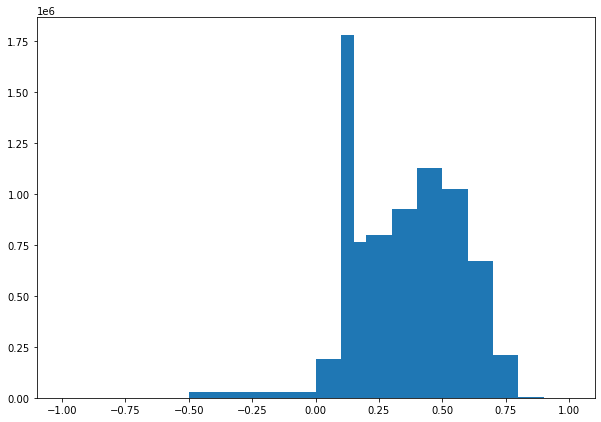

In [16]:
from matplotlib import pyplot as plt
 
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(labels.mean(axis=1), bins = [-1, -0.5, 0,0.1,0.15,0.2,0.3,0.4, 0.5,0.6,0.7,0.8,0.9, 1])
 
# Show plot
plt.show()